First 50 digits of pi: 04233108251307480031023559119268403864399223056751...
Length of pi string: 10000


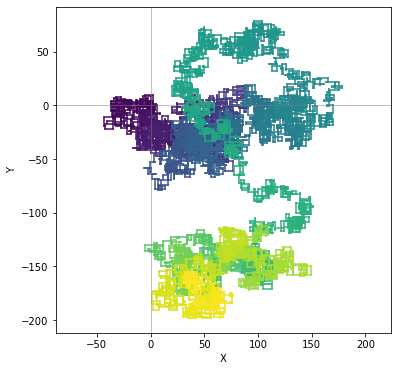

In [178]:
import mpmath
import math
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import matplotlib.cm as cm
from decimal import Decimal, getcontext
from mpmath import mp


# Function to compute sqrt(N) with 50 decimal places
def compute_sqrt(N):
    uptoDecimal = 10000
    mpmath.mp.dps = uptoDecimal+1  # Set decimal precision to 50 places
    sqrt_N = mpmath.sqrt(N)
    sqrt_str = str(sqrt_N)  # Convert to string
    
    # Extract digits after decimal point
    decimal_part = sqrt_str.split('.')[1][:uptoDecimal]  
    return decimal_part


def get_constant_as_string(expression, precision=10000):
    # Set the precision for the calculation
    mpmath.mp.dps = precision
    getcontext().prec = precision + 10  # Extra digits for safety

    # Calculate the value of the expression with high precision using Decimal
    value = Decimal(expression)

    # Convert the value to string
    value_str = str(value)

    # Find the decimal point and remove the '0.' part
    if '.' in value_str:
        value_str = value_str.split('.')[1]  # Get the digits after the decimal point
    else:
        value_str = ""  # No decimals, so just an empty string
    
    # Ensure that we have exactly the desired precision
    return value_str[:precision]  # Get the first 'precision' digits after the decimal


def draw_geometry(number_string, filename='file.pdf'):
    # Directions: right, down, left, up (clockwise turns)
    fig, ax = plt.subplots(figsize=(6, 6))
    directions = np.array([[1, 0], [0, -1], [-1, 0], [0, 1]])

    # Start at the origin (0, 0)
    x, y = 0, 0
    plt.plot(x, y, 'go')  # Plot the starting point
    
    # Initialize the current direction (0 = right, 1 = down, 2 = left, 3 = up)
    current_direction = 0
    
    # Total number of digits
    total_digits = len(number_string)
    
    # Use a colormap for the gradient (e.g., 'viridis', 'plasma', 'inferno')
    cmap = cm.viridis  # You can choose other colormaps too like 'plasma', 'inferno', etc.
    # cmap = cm.inferno
    
    # Loop through the digits in the number string and plot the path
    for i, digit in enumerate(number_string):
        length = int(digit)  # Get the length from the digit
        
        # Calculate the new coordinates
        x_new = x + directions[current_direction, 0] * length
        y_new = y + directions[current_direction, 1] * length
        
        # Calculate the normalized color intensity based on the number of digits processed
        color_intensity = i / total_digits  # Normalized value between 0 and 1
        color = cmap(color_intensity)  # Get the color from the colormap
        
        # Plot the line with the calculated color
        plt.plot([x, x_new], [y, y_new], color=color)
        
        # Update the position
        x, y = x_new, y_new
        
        # Rotate direction 90° clockwise
        current_direction = (current_direction - 1) % 4
    
    # Add faint grid lines along x and y axis passing through 0
    plt.axhline(0, color='gray', linewidth=0.5)  # Horizontal line at y=0
    plt.axvline(0, color='gray', linewidth=0.5)  # Vertical line at x=0
    
    # Show the plot
    plt.axis('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('')
    #plt.grid(True)
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()

# For sqrt ---------
# N = 2
# number_string = compute_sqrt(N)
# draw_geometry(number_string)

# For math constants --------
pi_str = str((mp.pi-mp.e)/10)[2:]  # Remove '3.' and get only the decimal part

# Print the first 50 digits to verify
print(f"First 50 digits of pi: {pi_str[:50]}...")
print(f"Length of pi string: {len(pi_str)}")


draw_geometry(pi_str)